### Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

### Helper Functions

In [2]:
def get_average(state_name):
    data_state = pd.read_csv('https://api.covidtracking.com/v1/states/' + state_name +'/daily.csv')
    death = pd.DataFrame(data_state['positiveIncrease'])
    days = []
    for i in range(death.size, 0, -1):
        days.append(i)

    death.insert(0, 'days', days)
    average_sum = 0
    for i in range(0, death['positiveIncrease'].size):
        average_sum += death['positiveIncrease'][i];
    
    return (average_sum/death['positiveIncrease'].size)    

### Getting State Names

In [3]:
state_names = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
state_names = state_names[0]
state_names = state_names.iloc[:,[0,1]]
state_names = state_names['Flag, name andpostal abbreviation[12]']
state_names = state_names.set_index('Flag, name andpostal abbreviation[12]')
state_names = state_names.to_dict()['Flag, name andpostal abbreviation[12].1']

removal_list = []
for key,value in state_names.items():
    state_names[key] = value.lower()
    if(key[-1] == ']'):
        removal_list.append(key)
        
for i in removal_list:
    value = state_names[i]
    state_names.pop(i)
    state_names[i[:-3]] = value
    
state_names

{'Alabama': 'al',
 'Alaska': 'ak',
 'Arizona': 'az',
 'Arkansas': 'ar',
 'California': 'ca',
 'Colorado': 'co',
 'Connecticut': 'ct',
 'Delaware': 'de',
 'Florida': 'fl',
 'Georgia': 'ga',
 'Hawaii': 'hi',
 'Idaho': 'id',
 'Illinois': 'il',
 'Indiana': 'in',
 'Iowa': 'ia',
 'Kansas': 'ks',
 'Louisiana': 'la',
 'Maine': 'me',
 'Maryland': 'md',
 'Michigan': 'mi',
 'Minnesota': 'mn',
 'Mississippi': 'ms',
 'Missouri': 'mo',
 'Montana': 'mt',
 'Nebraska': 'ne',
 'Nevada': 'nv',
 'New Hampshire': 'nh',
 'New Jersey': 'nj',
 'New Mexico': 'nm',
 'New York': 'ny',
 'North Carolina': 'nc',
 'North Dakota': 'nd',
 'Ohio': 'oh',
 'Oklahoma': 'ok',
 'Oregon': 'or',
 'Rhode Island': 'ri',
 'South Carolina': 'sc',
 'South Dakota': 'sd',
 'Tennessee': 'tn',
 'Texas': 'tx',
 'Utah': 'ut',
 'Vermont': 'vt',
 'Washington': 'wa',
 'West Virginia': 'wv',
 'Wisconsin': 'wi',
 'Wyoming': 'wy',
 'Kentucky': 'ky',
 'Massachusetts': 'ma',
 'Pennsylvania': 'pa',
 'Virginia': 'va'}

# COVID-19 Dataset for USA

In [4]:
x = requests.get('https://api.covidtracking.com/v1/us/daily.csv')
data_state = pd.read_csv('https://api.covidtracking.com/v1/states/ca/daily.csv')
data_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         369 non-null    int64  
 1   state                        369 non-null    object 
 2   positive                     369 non-null    int64  
 3   probableCases                0 non-null      float64
 4   negative                     49 non-null     float64
 5   pending                      28 non-null     float64
 6   totalTestResultsSource       369 non-null    object 
 7   totalTestResults             369 non-null    int64  
 8   hospitalizedCurrently        346 non-null    float64
 9   hospitalizedCumulative       0 non-null      float64
 10  inIcuCurrently               346 non-null    float64
 11  inIcuCumulative              0 non-null      float64
 12  onVentilatorCurrently        0 non-null      float64
 13  onVentilatorCumulati

For death and cases increase in USA with day 0 starting at date 20200304 :


<AxesSubplot:xlabel='days', ylabel='positiveIncrease'>

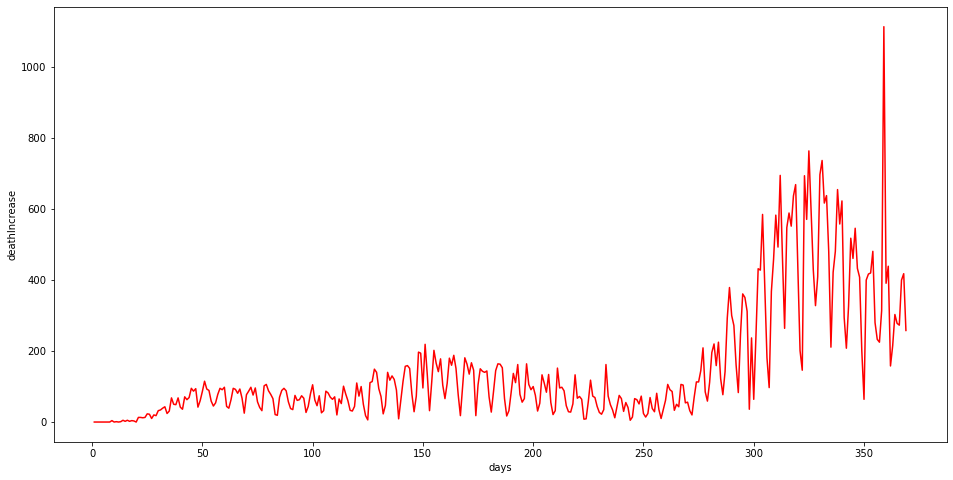

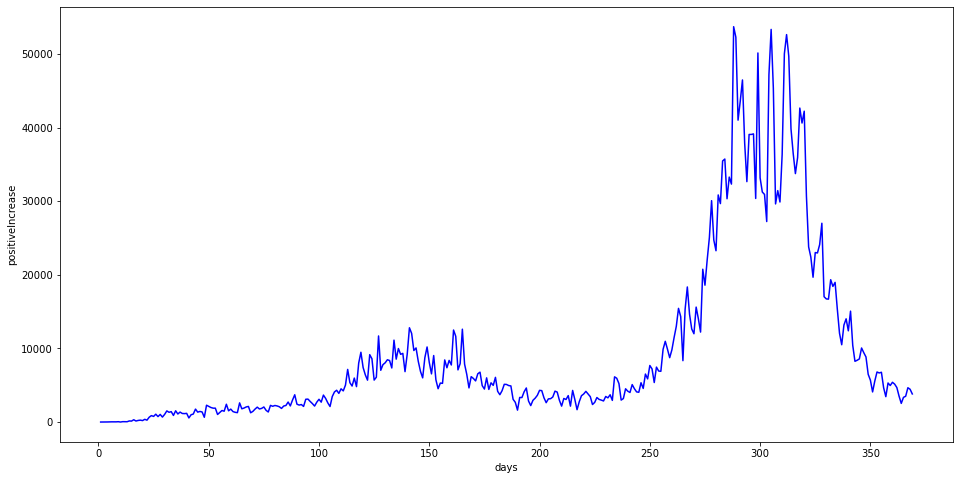

In [5]:
death = pd.DataFrame(data_state['deathIncrease'])
cases = pd.DataFrame(data_state['positiveIncrease'])
date = pd.DataFrame(data_state['date'])
days = []

for i in range(death.size, 0, -1):
    days.append(i)

death.insert(0, 'days', days)
cases.insert(0, 'days', days)

print("For death and cases increase in USA with day 0 starting at date", data_state['date'][data_state['date'].size -1], ":")

f = plt.figure(figsize=(16,8))
sb.lineplot(data = death, x ='days', y ='deathIncrease', color='red')

f = plt.figure(figsize=(16,8))
sb.lineplot(data = cases, x ='days', y ='positiveIncrease', color='blue')

In [6]:
average_sum = 0
for i in range(0, death['deathIncrease'].size):
    average_sum += death['deathIncrease'][i];
    
print(average_sum/death.size)

73.33875338753387


In [7]:
get_average(state_names['Alabama'])

1365.6256830601094

In [8]:
average_death_dict = {}
for name in state_names.keys():
    average_deaths = get_average(state_names[name])
    average_death_dict[name] = average_deaths

population_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population')
population_data = population_data[0]
population_data = population_data.iloc[:,[2,3]]
population_data = list(population_data.set_index('State or territory').to_dict().values())[0]

for i in average_death_dict.keys():
    average_death_dict[i] = int(average_death_dict[i])/int(population_data[(i,)])
    
for i in average_death_dict.keys():
    average_death_dict[i] = average_death_dict[i]*1000000

average_death_dict

state_data = pd.DataFrame.from_dict(average_death_dict, orient='index')

# Uni-Variate Data for Diversity Index

In [9]:
race_data = pd.read_csv('Ethnicity Data.csv')
race_data.info()

race_data = race_data.set_index('Location')
race_data = race_data.iloc[:,[8]]

combined_race_data = state_data.merge(race_data, left_index = True, right_index = True)
combined_race_data = combined_race_data.rename(columns={0:'Deaths'})
combined_race_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Location                                53 non-null     object 
 1   White                                   53 non-null     float64
 2   Black                                   53 non-null     float64
 3   Hispanic                                53 non-null     float64
 4   Asian                                   52 non-null     float64
 5   American Indian/Alaska Native           51 non-null     float64
 6   Native Hawaiian/Other Pacific Islander  22 non-null     object 
 7   Multiple Races                          53 non-null     float64
 8   Total                                   53 non-null     int64  
 9   Diversity by Simpson Index              53 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ KB


,Deaths,Diversity by Simpson Index
Alabama,277.352662,0.500450
Alaska,211.992483,0.398899
Arizona,301.695057,0.399927
Arkansas,292.028898,0.549913
California,241.007448,0.314060
Colorado,203.694428,0.510486
Connecticut,214.787380,0.473006
Delaware,243.208159,0.436243
Florida,217.408189,0.375466
Georgia,258.916489,0.380284


,Deaths,Diversity by Simpson Index
Deaths,1.000000,-0.042238
Diversity by Simpson Index,-0.042238,1.000000


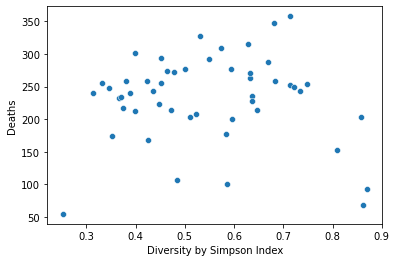

In [10]:
sb.scatterplot(data=combined_race_data,x = 'Diversity by Simpson Index' ,y = 'Deaths')
combined_race_data.corr()

Intercept of Regression 	: b =  [289.48093575]
Coefficients of Regression 	: a =  [[-111.71689933]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08259822930966854
Mean Squared Error (MSE) 	: 3534.4579206603607

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.40720482820140735
Mean Squared Error (MSE) 	: 7209.708196246152



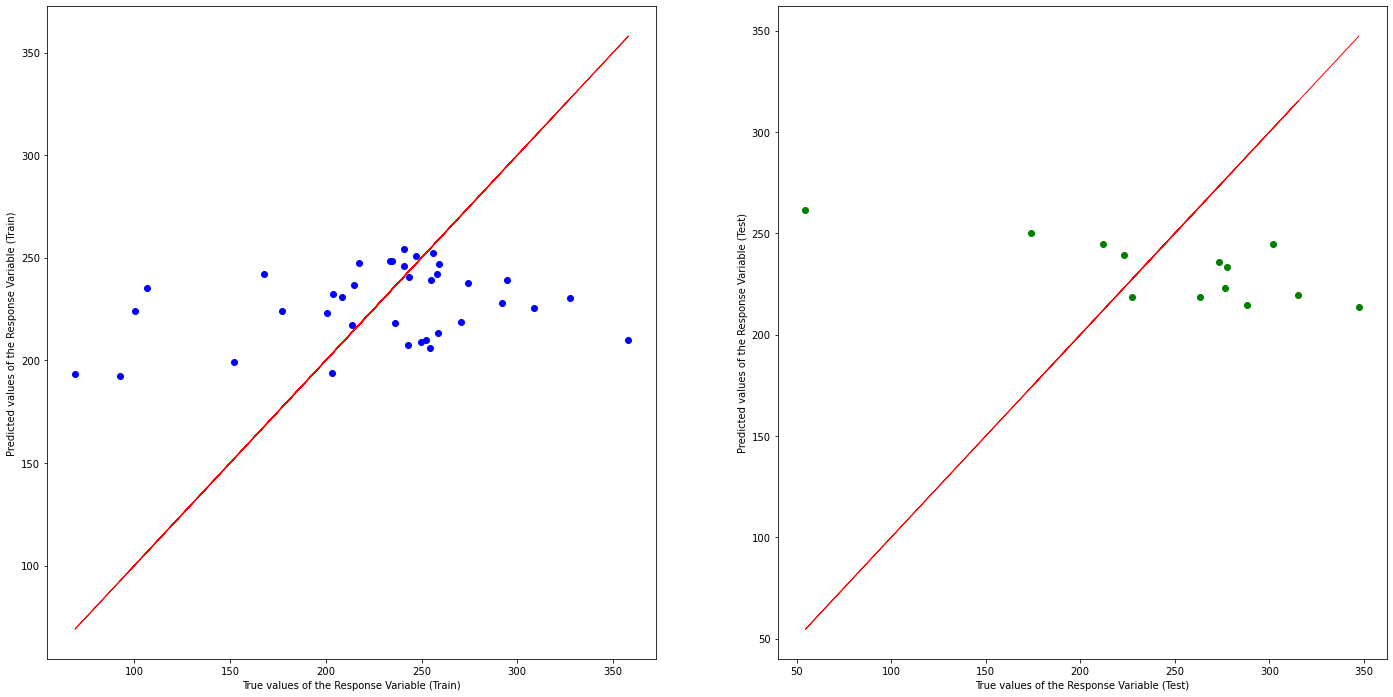

In [11]:
Race = pd.DataFrame(combined_race_data['Diversity by Simpson Index']) 
Deaths = pd.DataFrame(combined_race_data['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Race,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

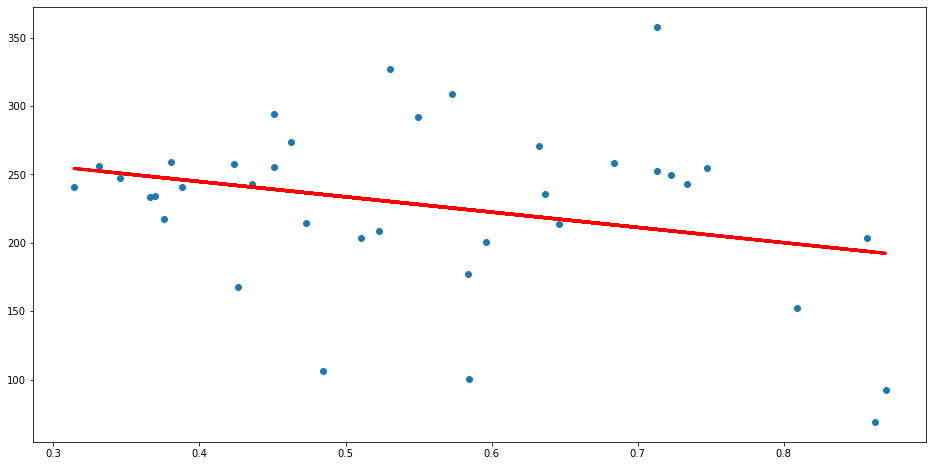

In [12]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate for % of Smokers per State

In [13]:
tobacco_data = pd.read_csv('Cigarette_use_USA.csv')
tobacco_data.info()

tobacco_data = tobacco_data.set_index('Location')
tobacco_data = tobacco_data.iloc[:,[0]]

combined_tobacco_data = state_data.merge(tobacco_data, left_index = True, right_index = True)
combined_tobacco_data = combined_tobacco_data.rename(columns={0:'Deaths','Data_Value':'% of Smokers'})
combined_tobacco_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               50 non-null     object 
 1   Data_Value             50 non-null     float64
 2   Low_Confidence_Limit   50 non-null     float64
 3   High_Confidence_Limit  50 non-null     float64
 4   Sample_Size            50 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.1+ KB


,Deaths,% of Smokers
Alabama,277.352662,19.2
Alaska,211.992483,19.1
Arizona,301.695057,14.0
Arkansas,292.028898,22.7
California,241.007448,11.2
Colorado,203.694428,14.5
Connecticut,214.787380,12.2
Delaware,243.208159,16.5
Florida,217.408189,14.5
Georgia,258.916489,16.1


,Deaths,% of Smokers
Deaths,1.000000,0.254479
% of Smokers,0.254479,1.000000


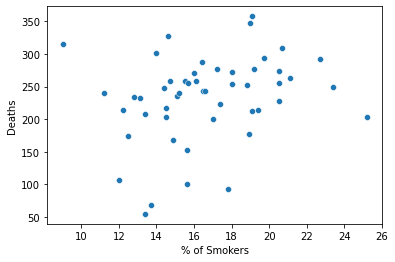

In [14]:
sb.scatterplot(data=combined_tobacco_data,x = '% of Smokers' ,y = 'Deaths')
combined_tobacco_data.corr()

Intercept of Regression 	: b =  [118.90881502]
Coefficients of Regression 	: a =  [[6.72423349]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09179230085225165
Mean Squared Error (MSE) 	: 4073.8029075420677

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.12683035491360406
Mean Squared Error (MSE) 	: 3896.7405143942856



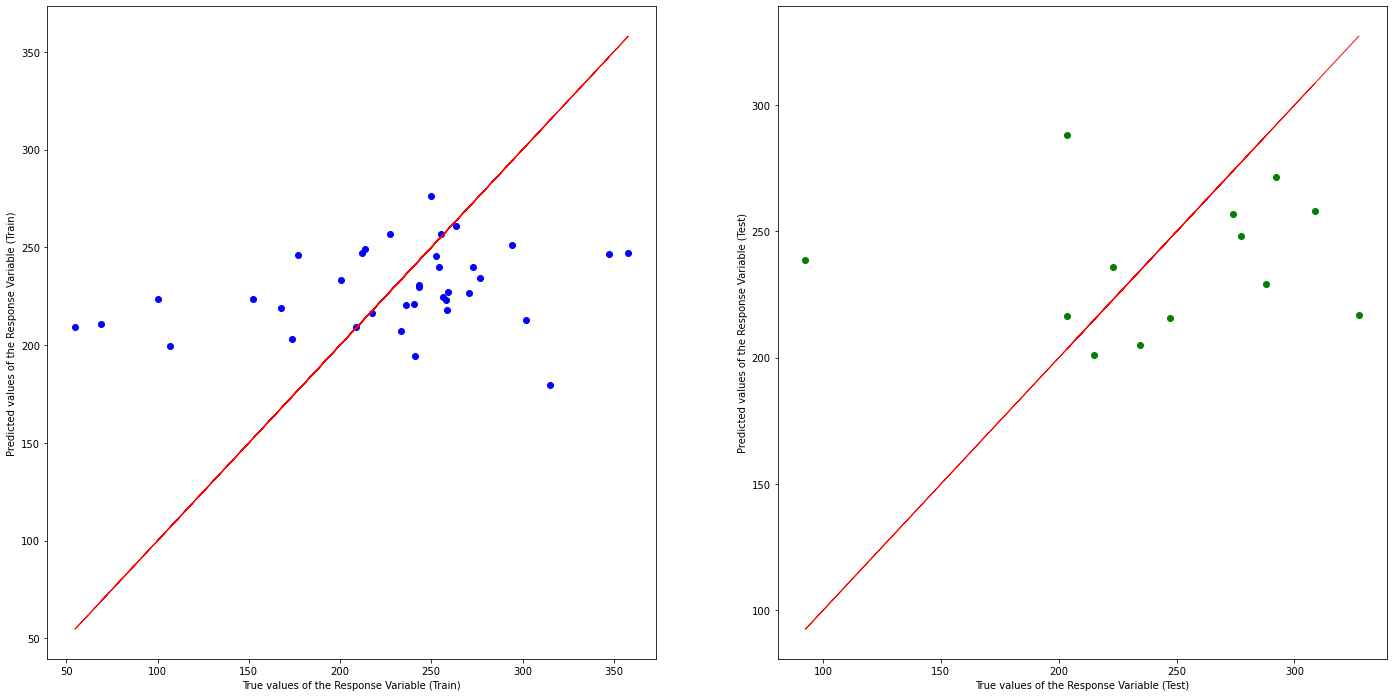

In [15]:
Smokers = pd.DataFrame(combined_tobacco_data['% of Smokers'])   # Response
Deaths = pd.DataFrame(combined_tobacco_data['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Smokers, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

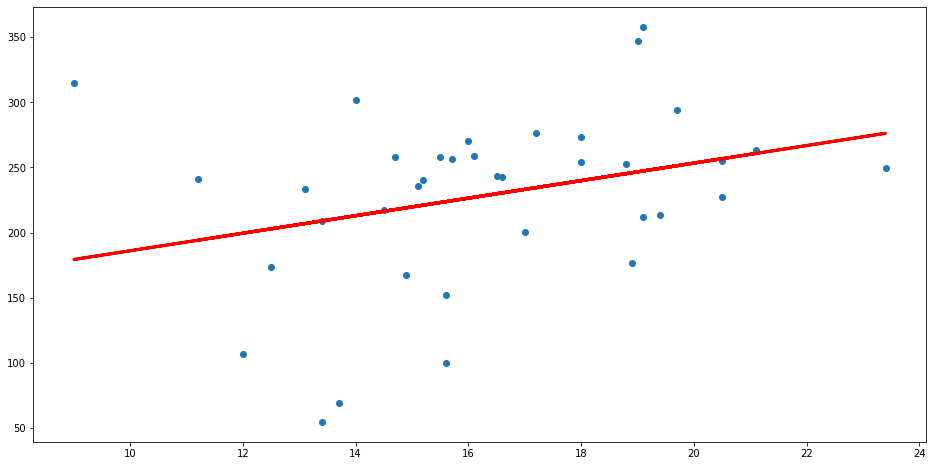

In [16]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Average Temperature per State per Year

In [17]:
data_temp = pd.read_csv("American Temp.csv")
data_temp.info()
data_temp = data_temp.set_index('Location')

combined_data_temp = state_data.merge(data_temp, left_index = True, right_index = True)
combined_data_temp = combined_data_temp.rename(columns={0:'Deaths'})
combined_data_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   50 non-null     object 
 1   Ferenheit  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


,Deaths,Ferenheit
Alabama,277.352662,62.8
Alaska,211.992483,26.6
Arizona,301.695057,60.3
Arkansas,292.028898,60.4
California,241.007448,59.4
Colorado,203.694428,45.1
Connecticut,214.787380,49.0
Delaware,243.208159,55.3
Florida,217.408189,70.7
Georgia,258.916489,63.5


,Deaths,Ferenheit
Deaths,1.000000,0.088166
Ferenheit,0.088166,1.000000


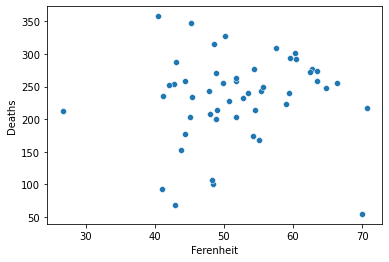

In [18]:
sb.scatterplot(data=combined_data_temp,x = 'Ferenheit' ,y = 'Deaths')
combined_data_temp.corr()

Intercept of Regression 	: b =  [193.38076068]
Coefficients of Regression 	: a =  [[0.71682562]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.012280080332461973
Mean Squared Error (MSE) 	: 3566.9019340666287

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.009270981227749608
Mean Squared Error (MSE) 	: 6166.20412290507



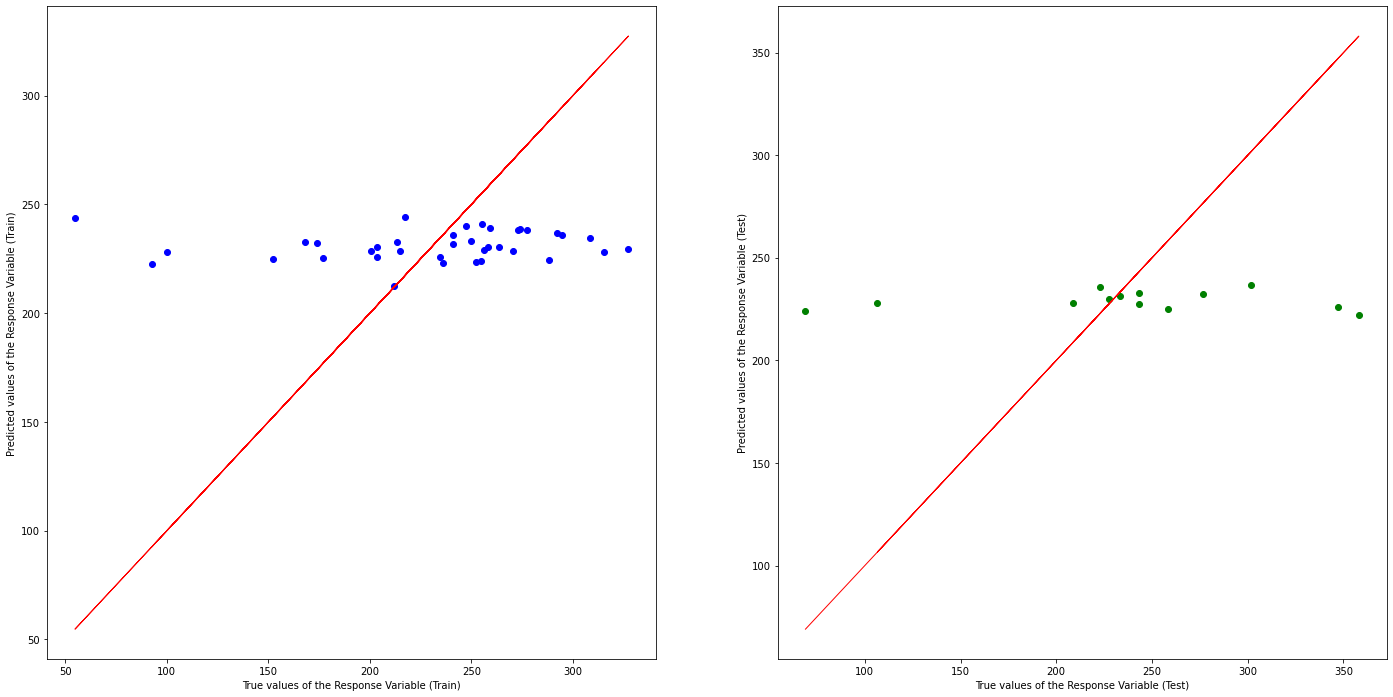

In [19]:
Ferenheit = pd.DataFrame(combined_data_temp['Ferenheit'])   # Response
Deaths = pd.DataFrame(combined_data_temp['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Ferenheit,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

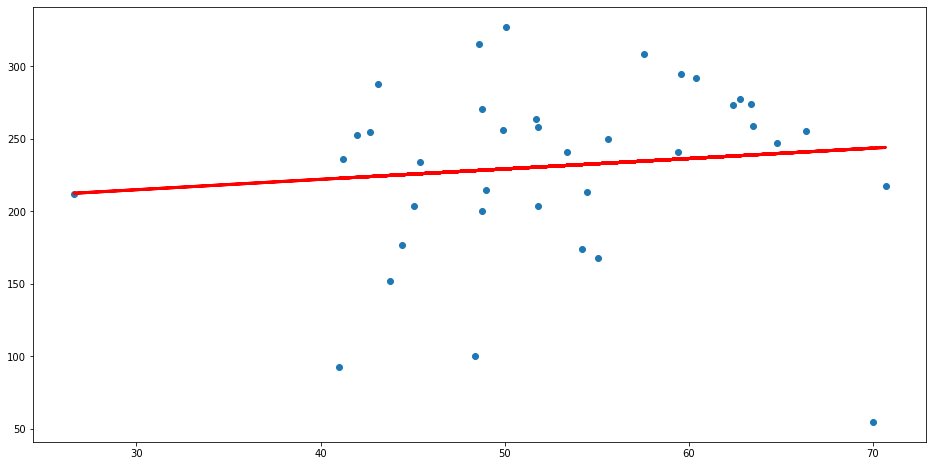

In [20]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Inpatient Expense

In [21]:
expenses_data = pd.read_csv("expenses_data.csv")
expenses_data.info()

expenses_data = expenses_data.set_index('Location')
expenses_data = expenses_data.rename(columns={"Expenses per Inpatient Day":"Expenses"})

combined_data_expenses = state_data.merge(expenses_data, left_index = True, right_index = True)
combined_data_expenses = combined_data_expenses.rename(columns={0:'Deaths'})
combined_data_expenses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    52 non-null     object
 1   Expenses per Inpatient Day  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


,Deaths,Expenses
Alabama,277.352662,1657
Alaska,211.992483,2397
Arizona,301.695057,2751
Arkansas,292.028898,1883
California,241.007448,3726
Colorado,203.694428,3047
Connecticut,214.787380,2884
Delaware,243.208159,3141
Florida,217.408189,2366
Georgia,258.916489,1939


,Deaths,Expenses
Deaths,1.000000,-0.419157
Expenses,-0.419157,1.000000


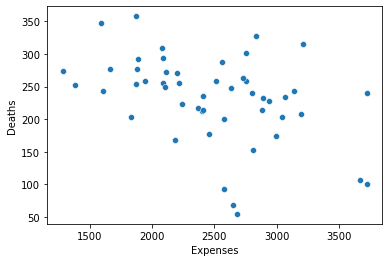

In [22]:
sb.scatterplot(data=combined_data_expenses,x = 'Expenses' ,y = 'Deaths')
combined_data_expenses.corr()

Intercept of Regression 	: b =  [355.05124471]
Coefficients of Regression 	: a =  [[-0.05053107]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18555758654325583
Mean Squared Error (MSE) 	: 3245.0673335736888

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.14263423702891898
Mean Squared Error (MSE) 	: 4339.028208287786



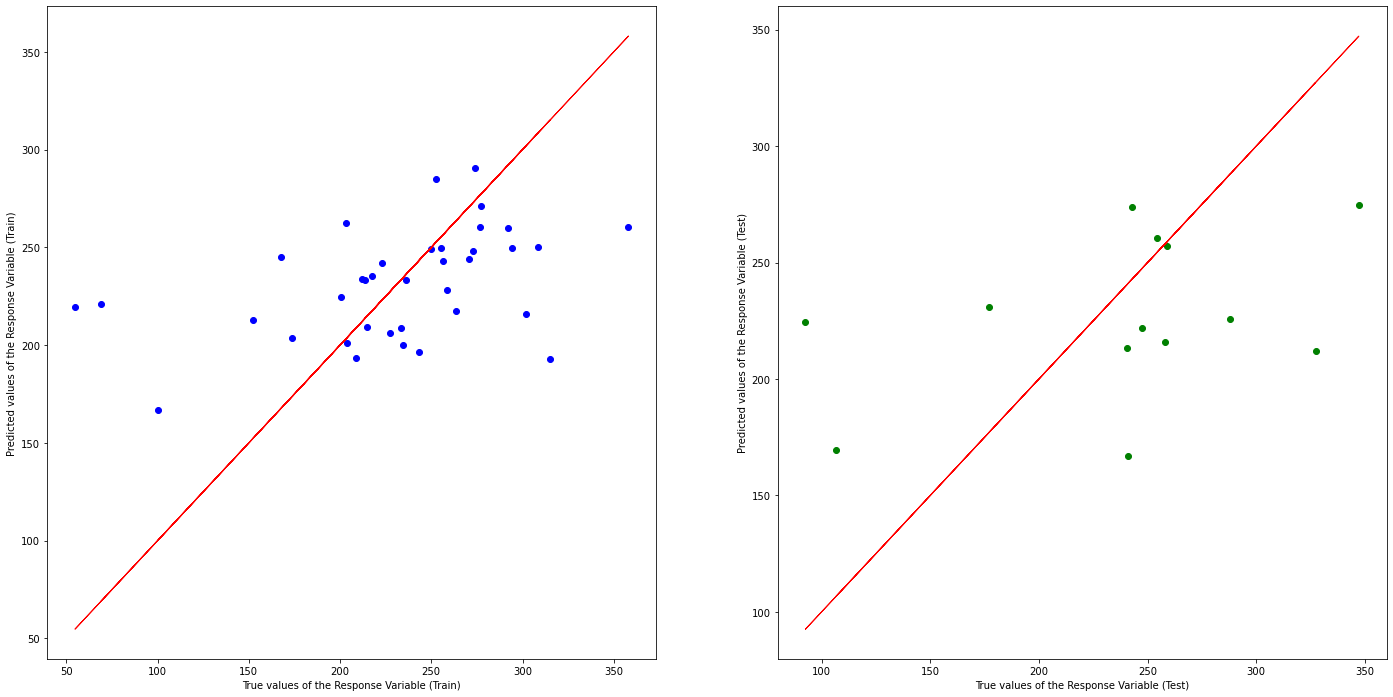

In [23]:
Expenses = pd.DataFrame(combined_data_expenses['Expenses'])   # Response
Deaths = pd.DataFrame(combined_data_expenses['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(Expenses,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

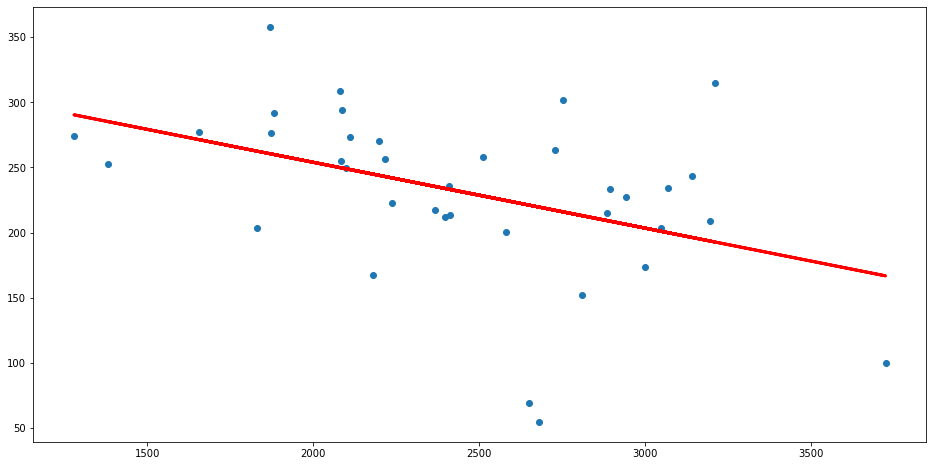

In [24]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Demographic

In [25]:
age_data = pd.read_csv("age_data.csv")
age_data = age_data.set_index('Location')
age_data.info()

combined_data_age = state_data.merge(age_data, left_index = True, right_index = True)
combined_data_age = combined_data_age.rename(columns={0:'Deaths'})
combined_data_age

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, United States to Puerto Rico
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Children 0-18  53 non-null     float64
 1   Adults 19-25   53 non-null     float64
 2   Adults 26-34   53 non-null     float64
 3   Adults 35-54   53 non-null     float64
 4   Adults 55-64   53 non-null     float64
 5   65+            53 non-null     float64
 6   Total          53 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 3.3+ KB


,Deaths,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Alabama,277.352662,0.237,0.087,0.115,0.251,0.135,0.175,1
Alaska,211.992483,0.259,0.093,0.139,0.246,0.132,0.130,1
Arizona,301.695057,0.240,0.093,0.121,0.241,0.124,0.182,1
Arkansas,292.028898,0.247,0.087,0.115,0.248,0.131,0.173,1
California,241.007448,0.237,0.092,0.137,0.263,0.123,0.149,1
Colorado,203.694428,0.231,0.089,0.141,0.265,0.126,0.148,1
Connecticut,214.787380,0.217,0.086,0.113,0.259,0.148,0.177,1
Delaware,243.208159,0.218,0.081,0.118,0.242,0.144,0.197,1
Florida,217.408189,0.209,0.080,0.114,0.249,0.137,0.211,1
Georgia,258.916489,0.253,0.089,0.122,0.267,0.125,0.145,1


<AxesSubplot:xlabel='Children 0-18', ylabel='Deaths'>

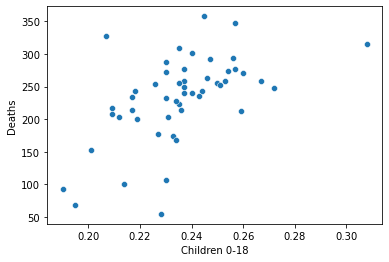

In [26]:
sb.scatterplot(data=combined_data_age,x = 'Children 0-18' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 19-25', ylabel='Deaths'>

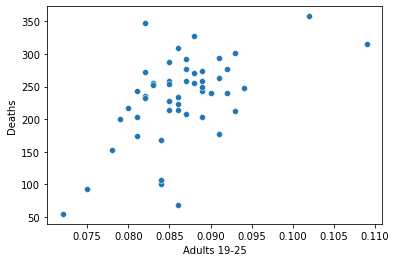

In [27]:
sb.scatterplot(data=combined_data_age,x = 'Adults 19-25' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 26-34', ylabel='Deaths'>

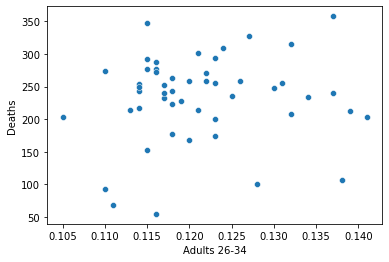

In [28]:
sb.scatterplot(data=combined_data_age,x = 'Adults 26-34' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 35-54', ylabel='Deaths'>

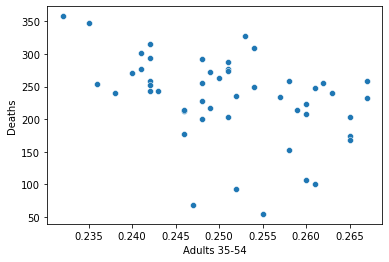

In [29]:
sb.scatterplot(data=combined_data_age,x = 'Adults 35-54' ,y = 'Deaths')

<AxesSubplot:xlabel='Adults 55-64', ylabel='Deaths'>

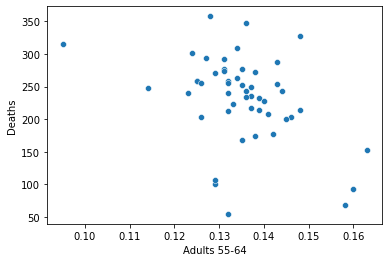

In [30]:
sb.scatterplot(data=combined_data_age,x = 'Adults 55-64' ,y = 'Deaths')

<AxesSubplot:xlabel='65+', ylabel='Deaths'>

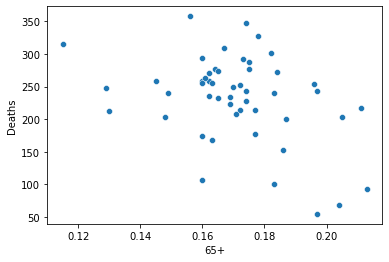

In [31]:
sb.scatterplot(data=combined_data_age,x = '65+' ,y = 'Deaths')

In [32]:
combined_data_age.corr()

,Deaths,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
Deaths,1.000000,0.553862,0.544574,0.095460,-0.412356,-0.401867,-0.390912,NaN
Children 0-18,0.553862,1.000000,0.644512,0.249457,-0.291626,-0.834127,-0.777154,NaN
Adults 19-25,0.544574,0.644512,1.000000,0.435012,-0.276112,-0.654767,-0.691184,NaN
Adults 26-34,0.095460,0.249457,0.435012,1.000000,0.246643,-0.513557,-0.662831,NaN
Adults 35-54,-0.412356,-0.291626,-0.276112,0.246643,1.000000,0.028506,-0.183161,NaN
Adults 55-64,-0.401867,-0.834127,-0.654767,-0.513557,0.028506,1.000000,0.745593,NaN
65+,-0.390912,-0.777154,-0.691184,-0.662831,-0.183161,0.745593,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Intercept of Regression 	: b =  [-157.81967624]
Coefficients of Regression 	: a =  [[1659.89658045]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3274395947608253
Mean Squared Error (MSE) 	: 2625.1346786571526

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2406807952938843
Mean Squared Error (MSE) 	: 3927.234126257547



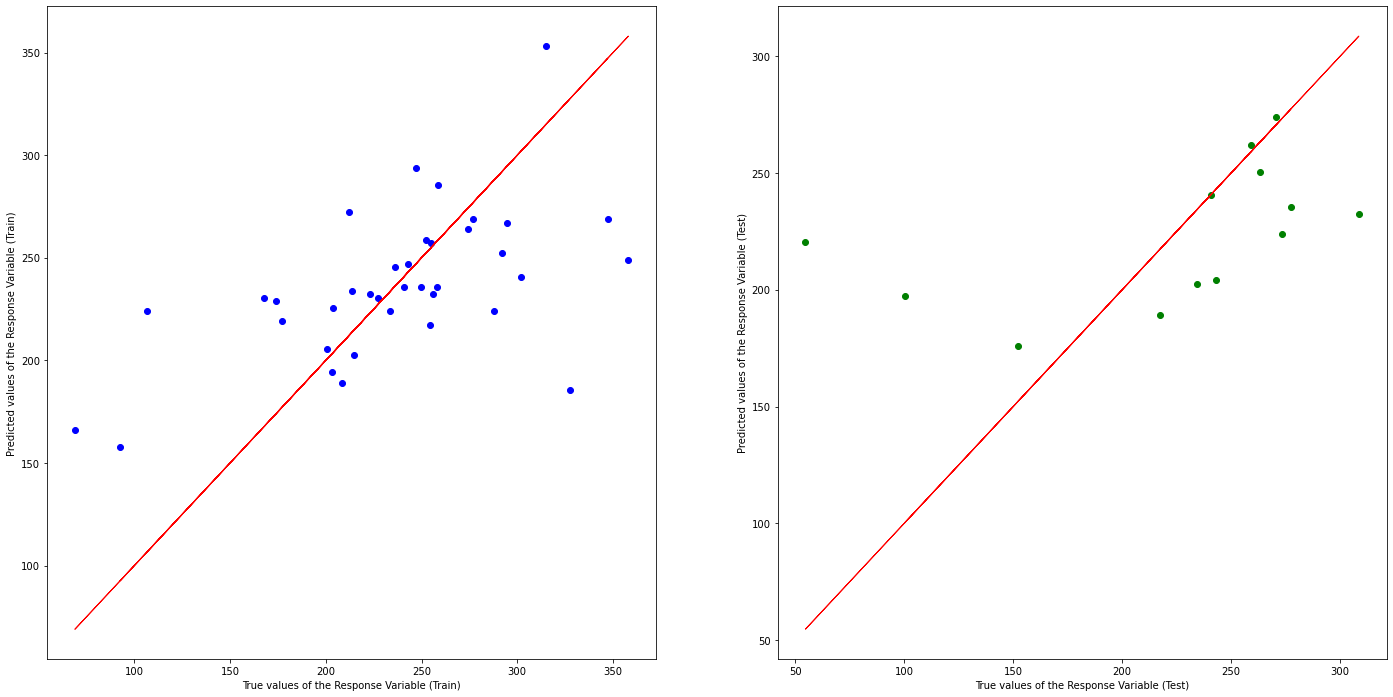

In [33]:
numberChildren = pd.DataFrame(combined_data_age['Children 0-18'])   # Response
Deaths = pd.DataFrame(combined_data_age['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(numberChildren,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

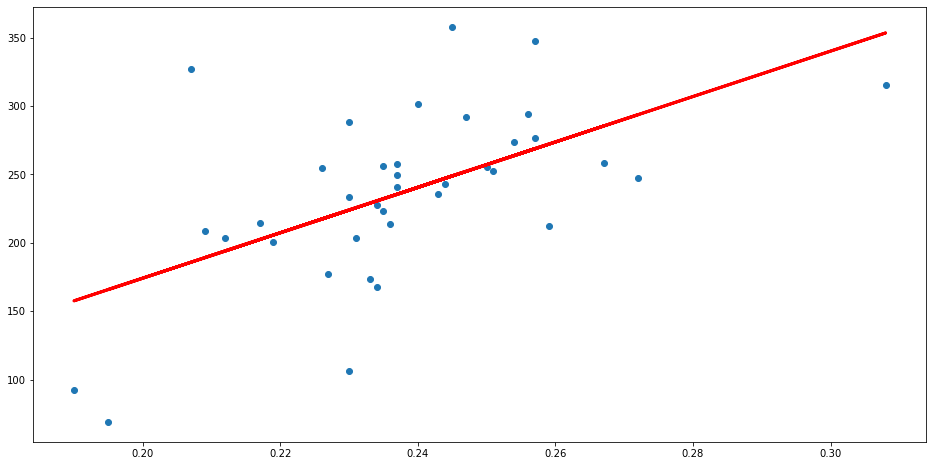

In [34]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate GDP

In [35]:
cgdp = pd.read_csv('Current_GDP_US_States_2019_Annually.csv')
cgdp.info()
cgdp = cgdp.loc[:, "GeoName":"2019"]
cgdp_state = cgdp[1:]
cgdp_state = cgdp_state.set_index("GeoName")
cgdp_state = cgdp_state.rename(columns={'2019':'CGDP per Capita'})

combined_data_cgdp = state_data.merge(cgdp_state, left_index = True, right_index = True)
combined_data_cgdp = combined_data_cgdp.rename(columns={0:'Deaths'})
combined_data_cgdp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFips  60 non-null     int64  
 1   GeoName  60 non-null     object 
 2   2019     60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


,Deaths,CGDP per Capita
Alabama,277.352662,228142.6
Alaska,211.992483,54385.6
Arizona,301.695057,370119.1
Arkansas,292.028898,130954.1
California,241.007448,3132800.6
Colorado,203.694428,392986.0
Connecticut,214.787380,287822.2
Delaware,243.208159,77082.4
Florida,217.408189,1106500.1
Georgia,258.916489,625713.6


,Deaths,CGDP per Capita
Deaths,1.000000,-0.024722
CGDP per Capita,-0.024722,1.000000


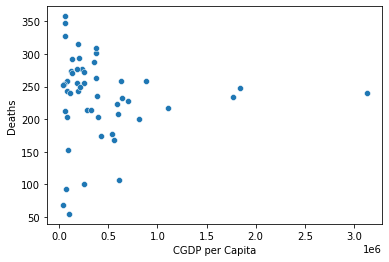

In [36]:
sb.scatterplot(data = combined_data_cgdp, y = 'Deaths', x = 'CGDP per Capita')
combined_data_cgdp.corr()

Intercept of Regression 	: b =  [227.92916183]
Coefficients of Regression 	: a =  [[-6.06496814e-07]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 2.4969670573860014e-05
Mean Squared Error (MSE) 	: 4956.934075191362

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.20251762324339073
Mean Squared Error (MSE) 	: 2419.378656327906



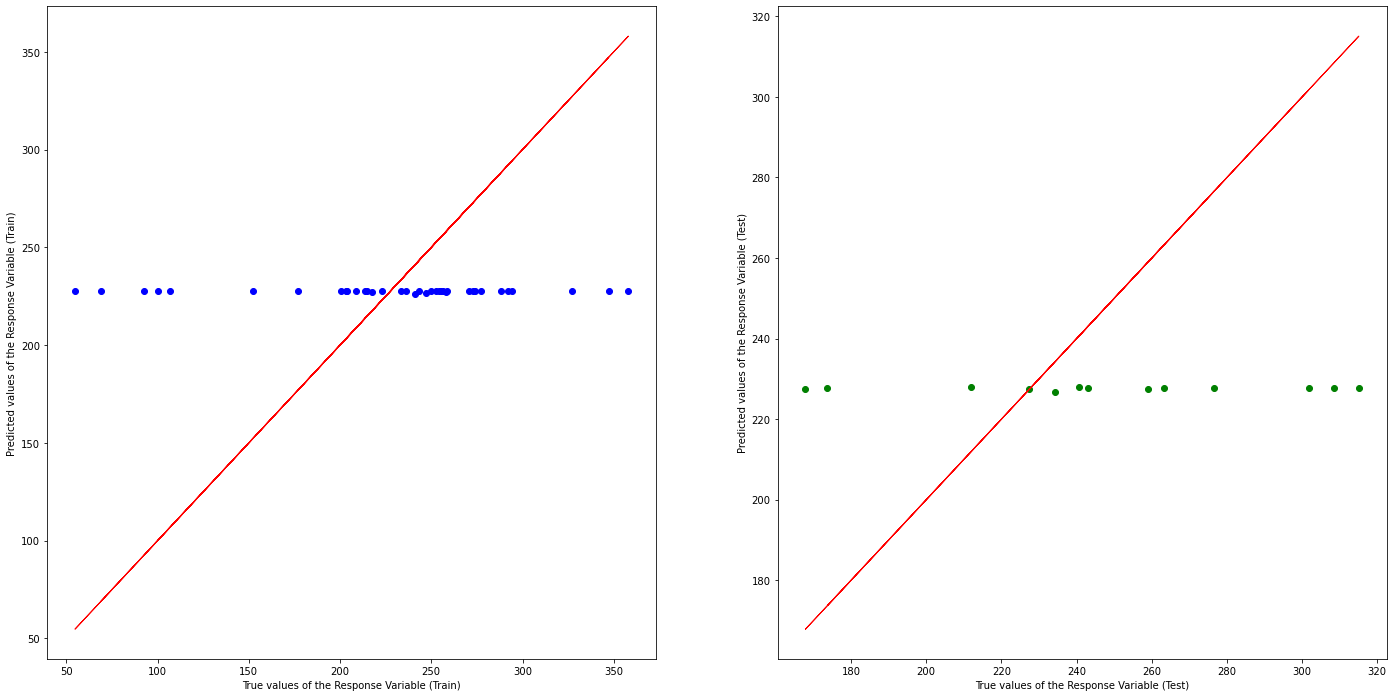

In [37]:
CGDP = pd.DataFrame(combined_data_cgdp['CGDP per Capita'])   # Response
Deaths = pd.DataFrame(combined_data_cgdp['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(CGDP, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

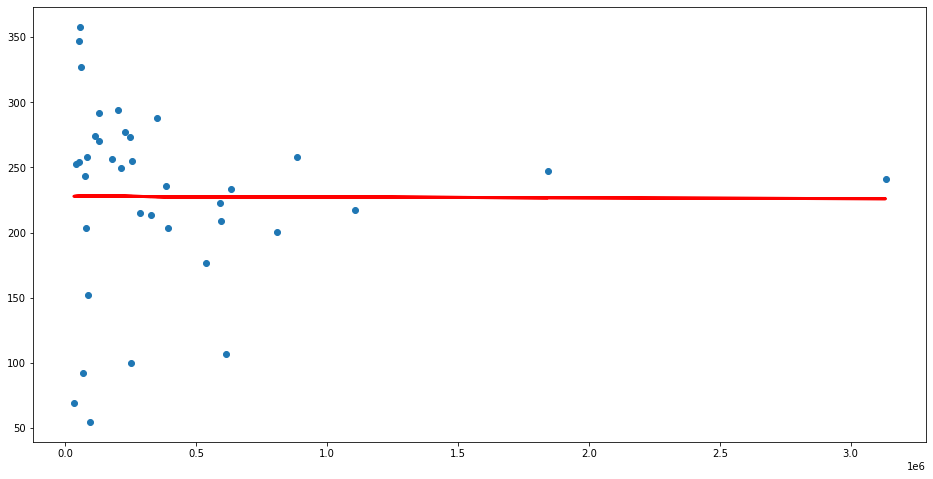

In [38]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Operating Surplus

In [39]:
opSur = pd.read_csv('Operating_Surplus_US_States_2019_Annually.csv')
opSur.info()
opSur = opSur.loc[:, "GeoName":"2019"]
opSur_state = opSur[1:]
opSur_state = opSur_state.set_index("GeoName")
opSur_state = opSur_state.rename(columns={'2019':'Operating Surplus'})

combined_data_opSur = state_data.merge(opSur_state, left_index = True, right_index = True)
combined_data_opSur = combined_data_opSur.rename(columns={0:'Deaths'})
combined_data_opSur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFips  60 non-null     int64  
 1   GeoName  60 non-null     object 
 2   2019     60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


,Deaths,Operating Surplus
Alabama,277.352662,88069.6
Alaska,211.992483,20791.5
Arizona,301.695057,142217.3
Arkansas,292.028898,48087.1
California,241.007448,1326813.4
Colorado,203.694428,150803.8
Connecticut,214.787380,120225.3
Delaware,243.208159,38119.1
Florida,217.408189,411739.3
Georgia,258.916489,259737.5


,Deaths,Operating Surplus
Deaths,1.000000,-0.017125
Operating Surplus,-0.017125,1.000000


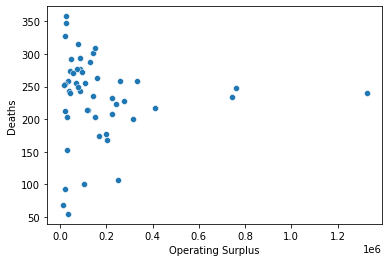

In [40]:
sb.scatterplot(data = combined_data_opSur, y = 'Deaths', x = 'Operating Surplus')
combined_data_opSur.corr()

Intercept of Regression 	: b =  [228.90405152]
Coefficients of Regression 	: a =  [[-6.71873996e-07]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 6.26779524404153e-06
Mean Squared Error (MSE) 	: 3998.0247711213788

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.05248691577384146
Mean Squared Error (MSE) 	: 5110.478866217993



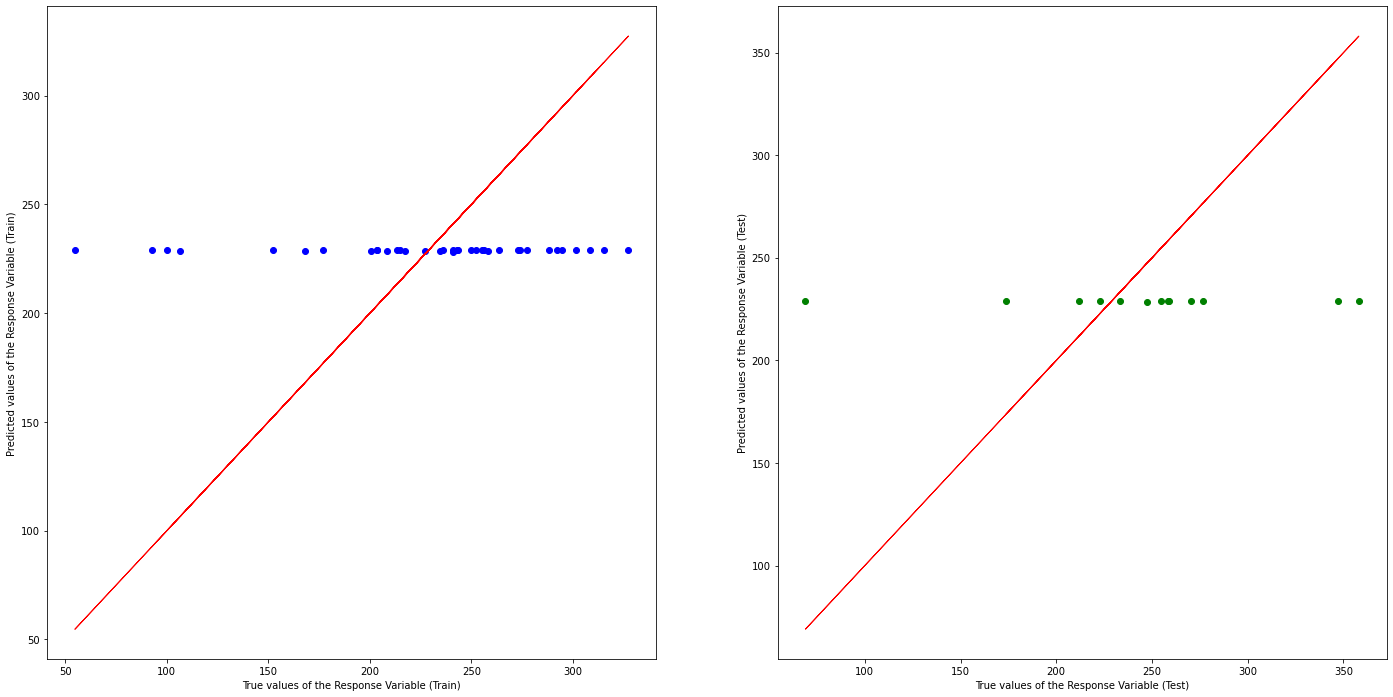

In [41]:
OpSur = pd.DataFrame(combined_data_opSur['Operating Surplus'])   # Response
Deaths = pd.DataFrame(combined_data_opSur['Deaths']) 

X_train, X_test, y_train, y_test = train_test_split(OpSur, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

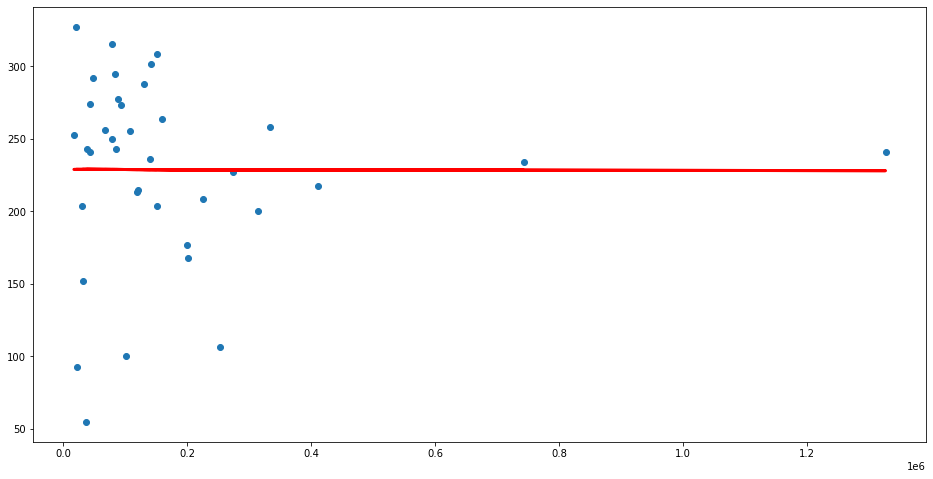

In [42]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Multi-Variate for all Values

In [46]:
combined_data = pd.concat([combined_race_data,
                        combined_tobacco_data,
                        combined_data_temp,
                        combined_data_expenses,
                        combined_data_cgdp,
                        combined_data_opSur,
                        combined_data_age], axis=1)

combined_data = combined_data.loc[:,~combined_data.columns.duplicated()]
combined_data = combined_data.loc[:,:"65+"]
combined_data

,Deaths,Diversity by Simpson Index,% of Smokers,Ferenheit,Expenses,CGDP per Capita,Operating Surplus,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+
Alabama,277.352662,0.500450,19.2,62.8,1657,228142.6,88069.6,0.237,0.087,0.115,0.251,0.135,0.175
Alaska,211.992483,0.398899,19.1,26.6,2397,54385.6,20791.5,0.259,0.093,0.139,0.246,0.132,0.130
Arizona,301.695057,0.399927,14.0,60.3,2751,370119.1,142217.3,0.240,0.093,0.121,0.241,0.124,0.182
Arkansas,292.028898,0.549913,22.7,60.4,1883,130954.1,48087.1,0.247,0.087,0.115,0.248,0.131,0.173
California,241.007448,0.314060,11.2,59.4,3726,3132800.6,1326813.4,0.237,0.092,0.137,0.263,0.123,0.149
Colorado,203.694428,0.510486,14.5,45.1,3047,392986.0,150803.8,0.231,0.089,0.141,0.265,0.126,0.148
Connecticut,214.787380,0.473006,12.2,49.0,2884,287822.2,120225.3,0.217,0.086,0.113,0.259,0.148,0.177
Delaware,243.208159,0.436243,16.5,55.3,3141,77082.4,38119.1,0.218,0.081,0.118,0.242,0.144,0.197
Florida,217.408189,0.375466,14.5,70.7,2366,1106500.1,411739.3,0.209,0.080,0.114,0.249,0.137,0.211
Georgia,258.916489,0.380284,16.1,63.5,1939,625713.6,259737.5,0.253,0.089,0.122,0.267,0.125,0.145


In [47]:
combined_data.corr()

,Deaths,Diversity by Simpson Index,% of Smokers,Ferenheit,Expenses,CGDP per Capita,Operating Surplus,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+
Deaths,1.000000,-0.042238,0.254479,0.088166,-0.419157,-0.024722,-0.017125,0.553862,0.544574,0.095460,-0.412356,-0.401867,-0.390912
Diversity by Simpson Index,-0.042238,1.000000,0.398520,-0.529836,-0.273736,-0.452417,-0.445107,-0.176488,-0.037175,-0.392895,-0.436378,0.439269,0.330066
% of Smokers,0.254479,0.398520,1.000000,0.050554,-0.651444,-0.368534,-0.365431,0.016768,-0.071993,-0.420755,-0.339524,0.227516,0.209217
Ferenheit,0.088166,-0.529836,0.050554,1.000000,-0.115696,0.259897,0.253358,0.100015,-0.086701,-0.240792,0.222388,-0.273215,0.077599
Expenses,-0.419157,-0.273736,-0.651444,-0.115696,1.000000,0.424387,0.422383,-0.266053,0.000454,0.497291,0.420906,-0.055226,-0.090632
CGDP per Capita,-0.024722,-0.452417,-0.368534,0.259897,0.424387,1.000000,0.998517,-0.005170,0.111867,0.402833,0.436132,-0.247362,-0.264223
Operating Surplus,-0.017125,-0.445107,-0.365431,0.253358,0.422383,0.998517,1.000000,0.008295,0.125064,0.408281,0.421441,-0.256026,-0.273518
Children 0-18,0.553862,-0.176488,0.016768,0.100015,-0.266053,-0.005170,0.008295,1.000000,0.644512,0.249457,-0.291626,-0.834127,-0.777154
Adults 19-25,0.544574,-0.037175,-0.071993,-0.086701,0.000454,0.111867,0.125064,0.644512,1.000000,0.435012,-0.276112,-0.654767,-0.691184
Adults 26-34,0.095460,-0.392895,-0.420755,-0.240792,0.497291,0.402833,0.408281,0.249457,0.435012,1.000000,0.246643,-0.513557,-0.662831
